In [61]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [62]:
scaler = StandardScaler()
df = pd.read_csv("Wholesale customers data.csv")
                


In [63]:
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [64]:
scaled_data = scaler.fit_transform(df)

In [65]:
scaled_data

array([[ 1.44865163,  0.59066829,  0.05293319, ..., -0.58936716,
        -0.04356873, -0.06633906],
       [ 1.44865163,  0.59066829, -0.39130197, ..., -0.27013618,
         0.08640684,  0.08915105],
       [ 1.44865163,  0.59066829, -0.44702926, ..., -0.13753572,
         0.13323164,  2.24329255],
       ...,
       [ 1.44865163,  0.59066829,  0.20032554, ..., -0.54337975,
         2.51121768,  0.12145607],
       [-0.69029709,  0.59066829, -0.13538389, ..., -0.41944059,
        -0.56977032,  0.21304614],
       [-0.69029709,  0.59066829, -0.72930698, ..., -0.62009417,
        -0.50488752, -0.52286938]])

In [66]:
kmeans = KMeans(n_clusters=2, init = 'k-means++')


In [67]:
kmeans.fit(scaled_data)


KMeans(n_clusters=2)

In [68]:
kmeans.inertia_ #inertia/SSE measures how well a data was clustered by kmeans

2599.3873849123083

In [69]:
SSE = []
for num_clusters in range(1,20):
    kmeans = KMeans(n_clusters=num_clusters, init = 'k-means++')
    kmeans.fit(scaled_data)
    SSE.append(kmeans.inertia_)

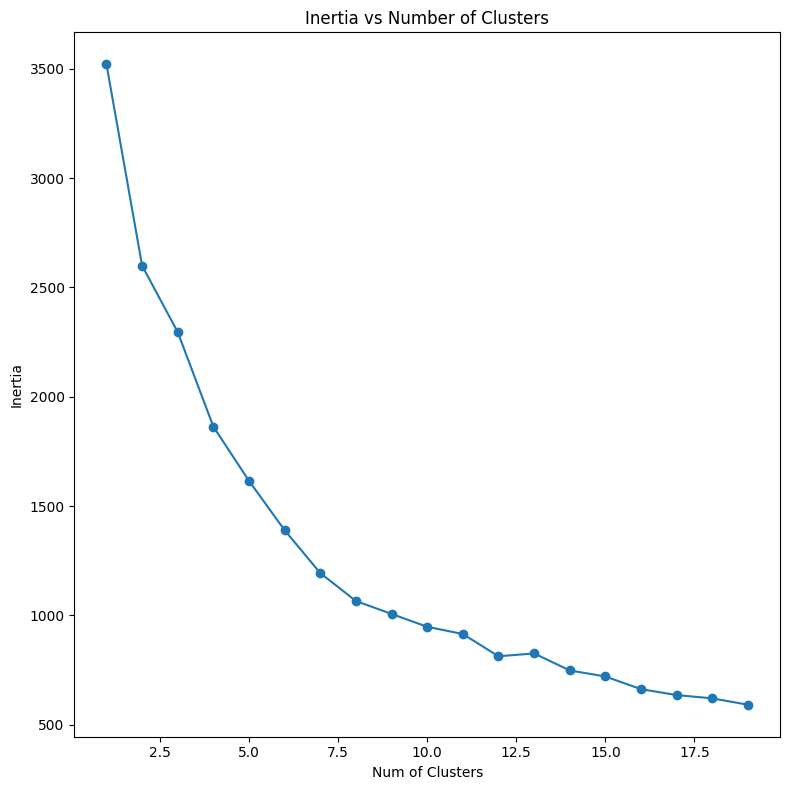

In [70]:
plt.figure(figsize=(8,8))
plt.plot(range(1,20), SSE, marker = 'o')
plt.xlabel('Num of Clusters')
plt.ylabel('Inertia')
plt.title('Inertia vs Number of Clusters')
plt.tight_layout()
plt.show()

We draw elbow curve just to find out how many clusters should be formed
The above elbow curve shows how inertia (distance between data points and centroids in cluster)
increases or decreases as number of clusters increases from 1 to 20
Can you tell the optimum number of clusters value from this plot? We should make clusters having
lesser value of inertia as clusters should be compact (distance between points and centroids
minimal). Lowest inertia will be at highest number of clusters. But we cannot make high number
of clusters. Because if we do then whats the point of making clusters! We want to categorize data
points in few clusters not many.
Looking at the above elbow curve, we can choose any number of clusters between 5 to 8. As these
are reasonable number of clusters with reasonable inertia

In [71]:
kmeans = KMeans(n_clusters=5, init = 'k-means++')
kmeans.fit(scaled_data)
predictions = kmeans.predict(scaled_data)

In [72]:
frame = pd.DataFrame(scaled_data)
frame['cluster'] = predictions
frame['cluster'].value_counts()

cluster
1    250
2    119
3     49
0     17
4      5
Name: count, dtype: int64